|| Data Visualisation Assignment ||

by: Alind Singh (R00224088)

In this assignment we explore two large datasets of NBA 2021-22 season; Regular and Playoffs. They contain information and statistics of all the players and teams.
We use several graph plots to gain interesting insights from the data and analyse top players and teams in various stat categories.

In [1]:
#Import all the required libraries required for visualising data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

#Loading the datasets
#Change the path of the CSV files to your local path after downloading the datasets in your local machine
regularDf = pd.read_csv(r'2021-2022 NBA Player Stats - Regular.csv', encoding='latin-1')
playoffsDf = pd.read_csv(r'2021-2022 NBA Player Stats - Playoffs.csv', encoding='latin-1')

First, we analyse who the top 3 Point Guards were during the regular season. The criteria to fulfil is that the players should play at the position of 'PG'; averaging more than 25 points, 6 assists and 1 steal per game.
We use a bar plot to visualise the result.

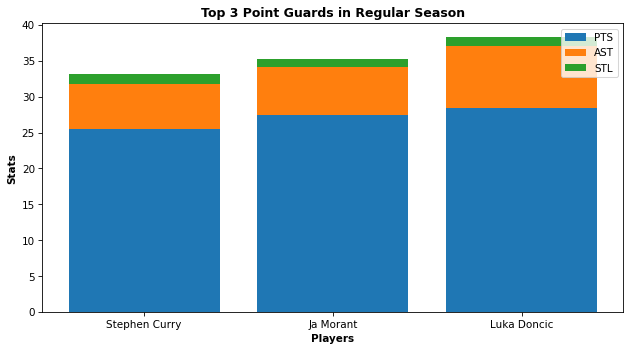

In [14]:
#We filter out the dataframe with the conditions mentioned above and store the first 3 results in a variable in ascending order
top_pgs = regularDf[(regularDf['Pos']=='PG') & (regularDf['PTS']>25) & (regularDf['AST']>6) & (regularDf['STL']>1)].sort_values(
    by='PTS',
    ascending=True
).head(3)

#Create bar plots for each player
plt.figure(figsize=(10,5), dpi=75)
plt.bar(top_pgs['Player'], top_pgs['PTS'])
plt.bar(top_pgs['Player'], top_pgs['AST'], bottom=top_pgs['PTS'])
plt.bar(top_pgs['Player'], top_pgs['STL'], bottom=top_pgs['PTS']+top_pgs['AST'])

#Set the axis labels and the title of the plot
plt.xlabel('Players',fontweight='bold')
plt.ylabel('Stats',fontweight='bold')
plt.legend(['PTS','AST','STL'],loc=1)
plt.title('Top 3 Point Guards in Regular Season',fontweight='bold')
plt.show()

Now we visualise the data distribution of the Age of players with respect to the Minutes Played per game they are averaging during the regular season.
We use a Hexbin plot to visualise this scenario. 
The color gradient ranges from yellow to orange to red.
Yellow signifies low density,
Orange signifies medium density,
Red signifies high density.
Depending upon the color and density of data points you can interpret players of what age averaged how many minutes played.

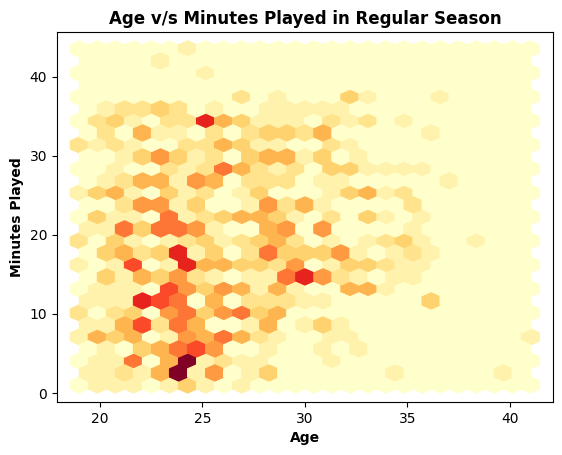

In [3]:
#Create a hexbin plot between Age and Minutes Played
plt.hexbin(regularDf['Age'],regularDf['MP'],gridsize=25,cmap='YlOrRd')

#Set the title of the plot and axis labels
plt.title('Age v/s Minutes Played in Regular Season',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Minutes Played',fontweight='bold')

plt.show()

We try and analyse who were the best 3 point shooters in the regular season.
The criteria to fulfil is that the players should have played 50 or more games and average more than 3 three-point field goals, 8 three-point field goals attempted and 35% three-point shot conversion per game.
We use horizontal bar plot to visualise the result.

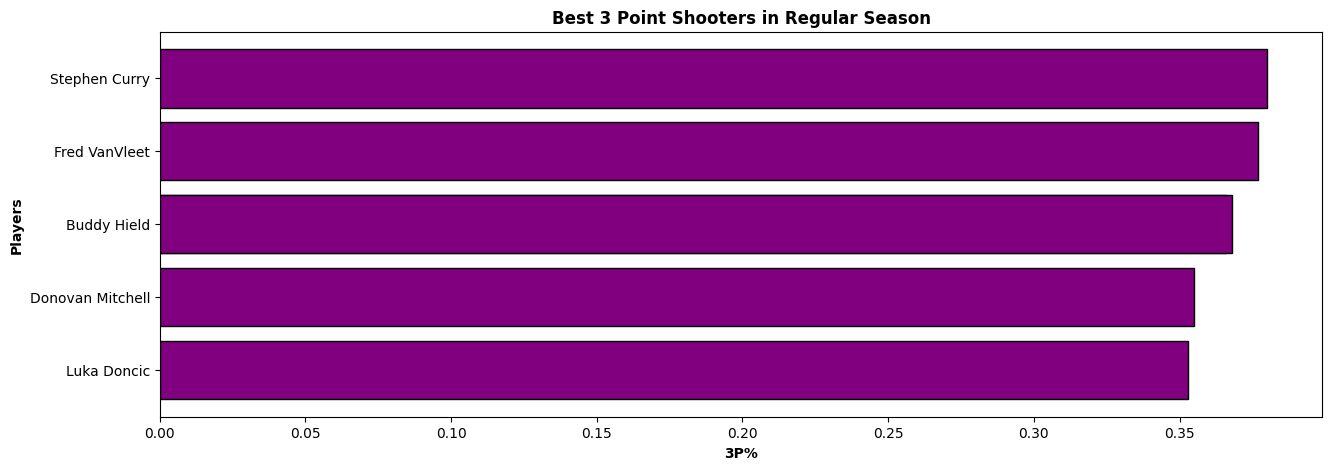

In [4]:
#Store the filtered dataframe based on the conditions mentioned above in a variable in ascending order
threeShooters = regularDf.query("G>49 & `3P`>3 & `3PA`>8 & `3P%`>0.35").sort_values('3P%',ascending=True)

#Create a horizontal bar plot
plt.figure(figsize=(15,5))
plt.barh(y=threeShooters['Player'],width=threeShooters['3P%'],color='purple',edgecolor='black')

#Set the title of the plot and axis labels
plt.xlabel('3P%',fontweight='bold')
plt.ylabel('Players',fontweight='bold')
plt.title('Best 3 Point Shooters in Regular Season',fontweight='bold')
plt.show()

Now we analyse which players were the best rebounders in regular season. To fulfil the criteria, players must be averaging more than 3 offensive rebounds, 3 defensive rebounds and 10 total rebounds per game.
We use horizontal bar plot to visualise the results in this case too.

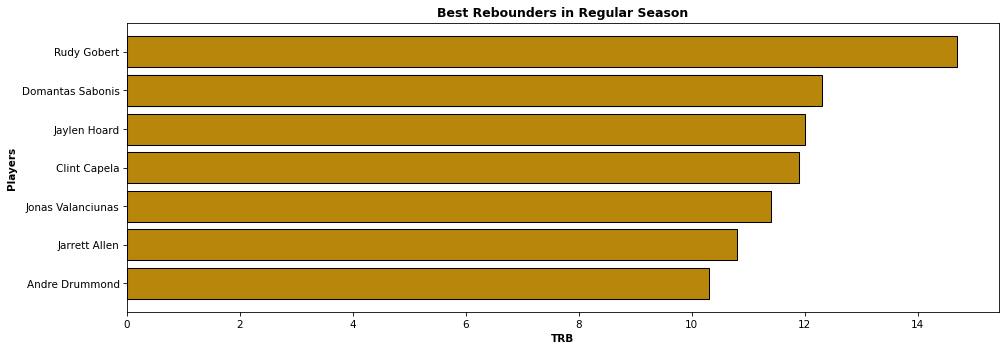

In [18]:
#Store the filtered dataframe on the basis of conditions mentioned above and sort it in ascending order
rebounders = regularDf.query("ORB>3 & DRB>3 & TRB>10").sort_values('TRB',ascending=True)

#Create a horizontal barplot of the filtered dataframe
plt.figure(figsize=(15,5), dpi=75)
plt.barh(y=rebounders['Player'],width=rebounders['TRB'],color='darkgoldenrod',edgecolor='black')

#Set the title of the plot and axis labels
plt.xlabel('TRB',fontweight='bold')
plt.ylabel('Players',fontweight='bold')
plt.title('Best Rebounders in Regular Season',fontweight='bold')
plt.show()

Now heading towards more complex data visualisations. 
We try to find the two columns/variables with highest correlation between them.
First we create a correlation matrix, then find and store the two variables with highest correlation along with their correlation coefficient in a series.

We plot a heatmap of the correlation matrix to visualise and verify the results.
After that, we use a scatter plot to visualise the correlation between the variables and then draw the line of best fit on the scatter plot for data interpretation.

The two columns with maximum correlation are FG and PTS , with correlation coefficient of 0.9899316307313043


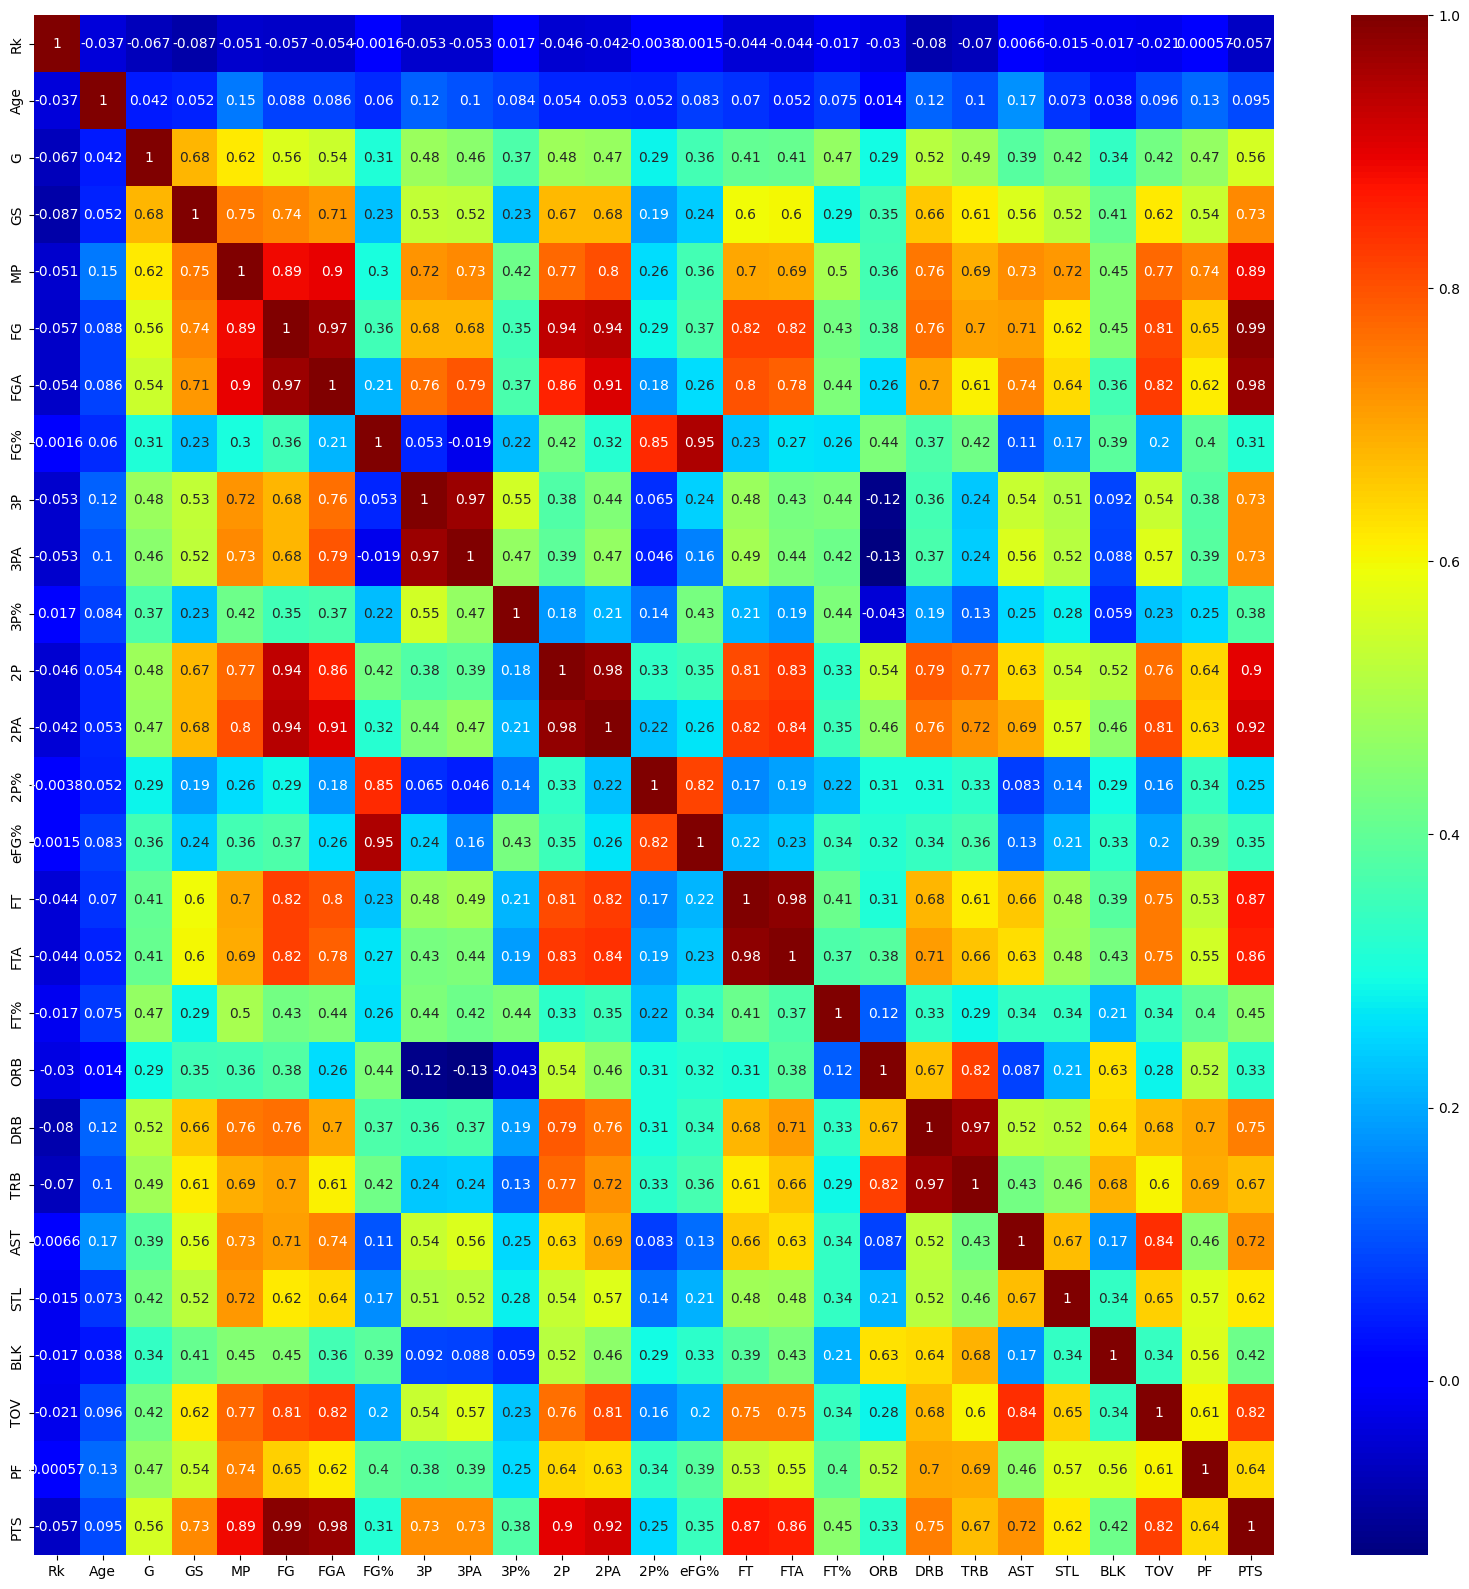

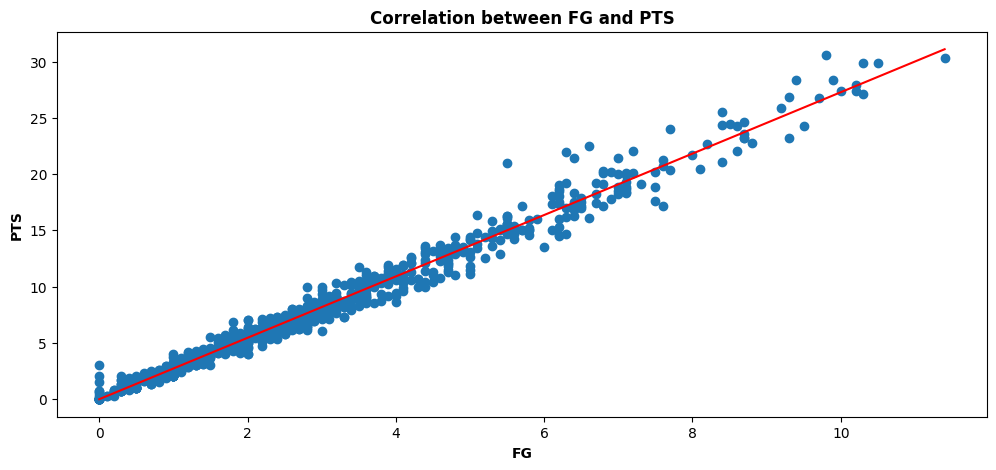

In [6]:
#Store the correlation matrix of the dataframe in a variable
cor_matrix = regularDf.corr(numeric_only=True)

#Stack the matrix in a dataframe with columns having the value of correlation coefficient less than 1
cor_stack = cor_matrix[cor_matrix != 1].stack().reset_index()

#Set the column names of the stacked dataframe
cor_stack.columns = ['col1','col2','cor']

#Access and store the column names with maximum value of correlation coefficient along with the value itself in a series
max_cor = cor_stack.loc[cor_stack['cor'].idxmax()]

#Print the two columns and the correlation coefficient
print("The two columns with maximum correlation are", max_cor['col1'], "and", max_cor['col2'], 
      ", with correlation coefficient of", max_cor['cor'])

#Create a heatmap of the correlation matrix of the original dataframe to verify the result
plt.figure(figsize=(20,20))
sea.heatmap(cor_matrix,cmap="jet", annot=True)
plt.show()

#Now create a scatter plot of the two extracted columns/variables 
plt.figure(figsize=(12,5))
plt.scatter(regularDf[max_cor['col1']],regularDf[max_cor['col2']])

#Calculate the line of best fit for the scatter plot
fit = np.polyfit(regularDf[max_cor['col1']],regularDf[max_cor['col2']],1)
xLine = np.array([regularDf[max_cor['col1']].min(),regularDf[max_cor['col1']].max()])
yLine = fit[0] * xLine + fit[1]

#Plot the line of best fit
plt.plot(xLine,yLine,color='red')

#Set the title of the plot and axis labels
plt.xlabel(max_cor['col1'],fontweight='bold')
plt.ylabel(max_cor['col2'],fontweight='bold')
plt.title(f"Correlation between {max_cor['col1']} and {max_cor['col2']}",fontweight='bold')
plt.show()

This time we calculate the points scored by each team in the playoffs. 
We use a stacked barplot to visualise the same.

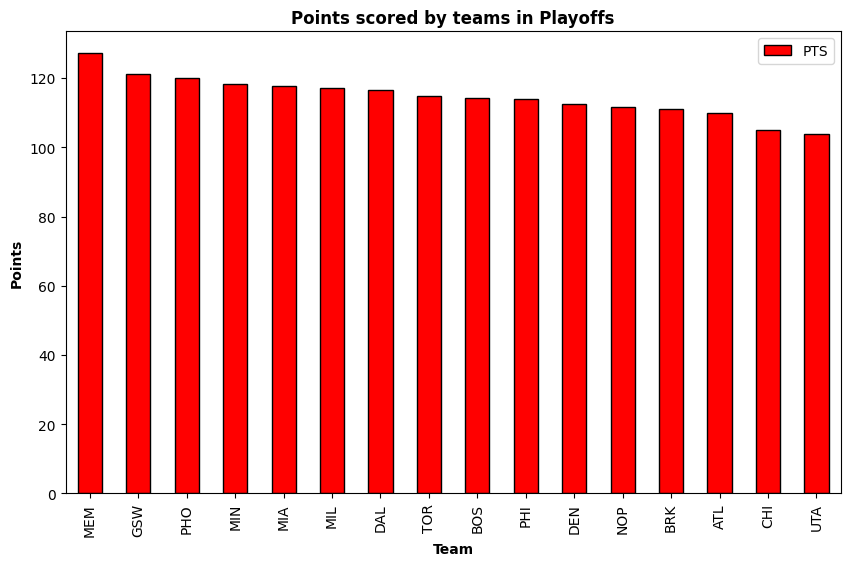

In [7]:
#Group the data by team and calculate the points scored
teamGroup = playoffsDf.groupby('Tm').agg({'PTS':'sum'})

#Sort the values in descending order
teamGroup = teamGroup.sort_values(by='PTS',ascending=False)

#Create a stacked barplot
teamGroup.plot(kind='bar', stacked=True, figsize=(10,6),color='red',edgecolor='black')

#Set the title of the plot and axis lables
plt.title('Points scored by teams in Playoffs',fontweight='bold')
plt.xlabel('Team',fontweight='bold')
plt.ylabel('Points',fontweight='bold')

plt.show()

Now we analyse the scoring performance of some players in each game during the playoffs.
We use a heatmap to visualise the pivoted table extracted from the original dataframe.
Column wise grouping is done by 'Games Played' and Row wise grouping is done by 'Players'.
We summarise the points scored by each player to visualise the heatmap.
Color gradient ranging from blue to red and represents points scored.
Blue -> Low Scoring,
Red -> High Scoring

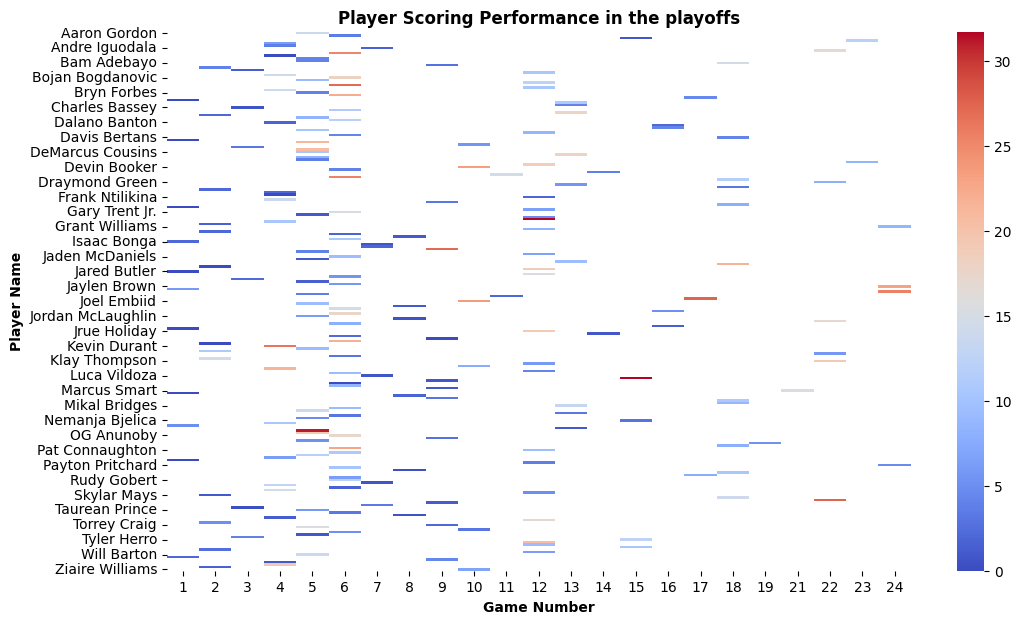

In [8]:
#Pivot the data to create a matrix of player scoring performance in the playoffs
pivotDf = pd.pivot_table(playoffsDf,values='PTS',index='Player',columns='G')

#Create a heatmap of the pivoted table
plt.figure(figsize=(12,7))
sea.heatmap(pivotDf,cmap='coolwarm')

#Set the title of the plot and axis labels
plt.title("Player Scoring Performance in the playoffs",fontweight='bold')
plt.xlabel('Game Number',fontweight='bold')
plt.ylabel('Player Name',fontweight='bold')

plt.show()

Now we analyse the relationship and data distribution of all the teams in the playoffs and three point field goals they averaged, during the course.
Boxplots are used to visualise the same.
We can interpret the outliers and skewness of the distribution for each team from the plot.

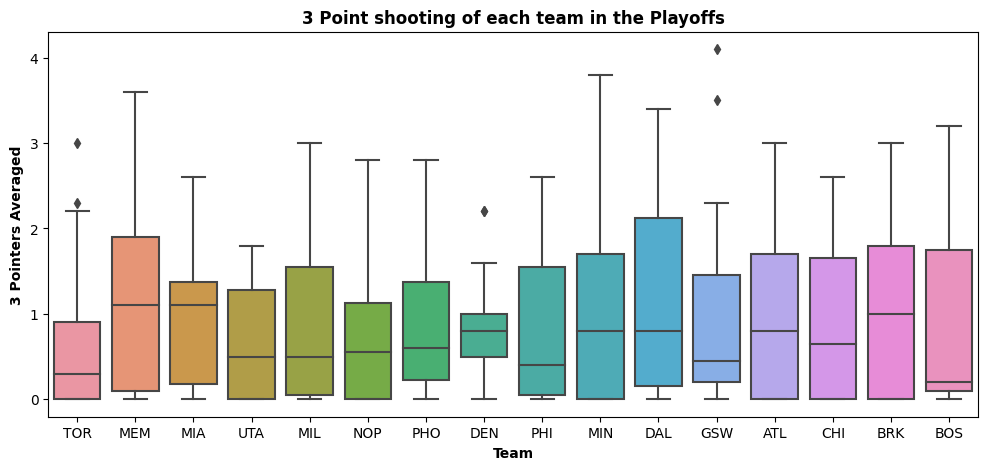

In [9]:
#Create the boxplot
plt.figure(figsize=(12,5))
sea.boxplot(x='Tm',y='3P',data=playoffsDf)

#Set the plot title and axis labels
plt.title('3 Point shooting of each team in the Playoffs',fontweight='bold')
plt.xlabel('Team',fontweight='bold')
plt.ylabel('3 Pointers Averaged',fontweight='bold')

plt.show()

At last, we analyse the relationship of the players at each position with minutes they played per game during the course of the playoffs.
We use a stacked histogram to visualise the frequency of the minutes played of players at each position.

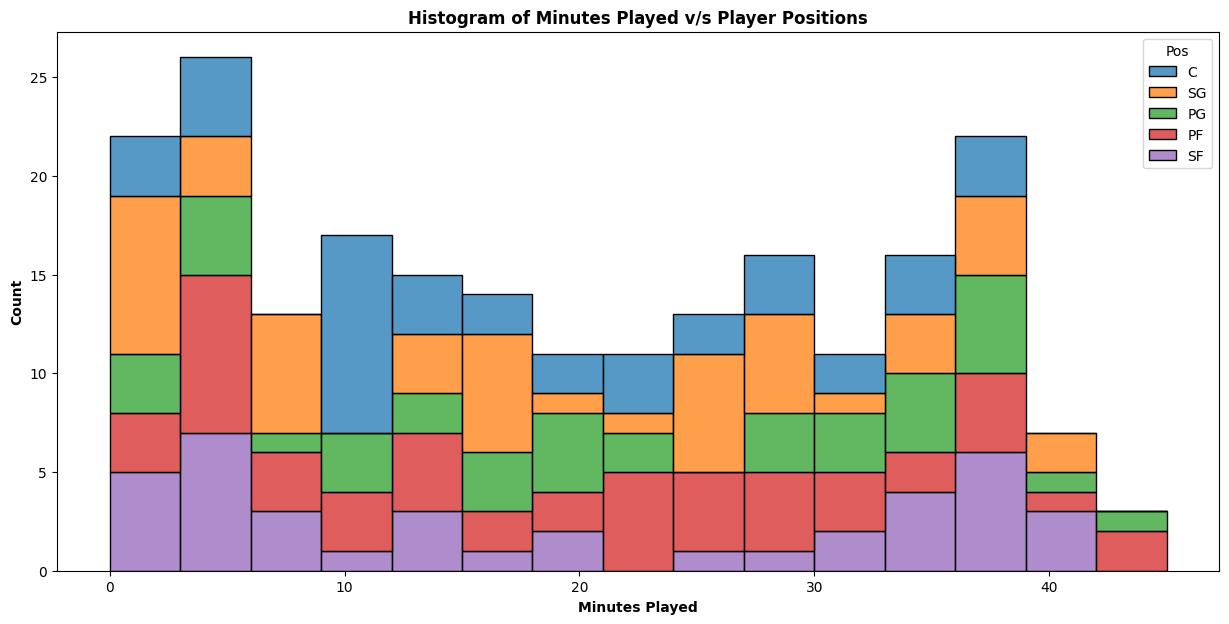

In [2]:
plt.figure(figsize=(15,7))

#Create a histogram plot of the minutes played by players at each position during playoffs
sea.histplot(
    data=playoffsDf,
    x='MP',
    hue='Pos',
    multiple='stack',
    binwidth=3
)

#Set the title of the plot and axis labels
plt.title('Histogram of Minutes Played v/s Player Positions',fontweight='bold')
plt.xlabel('Minutes Played',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()